# **Vision-Language Models : Bootcamp**

# Lab 0: Setup Notebook
This notebook helps you get set up and makes sure your computer can work with Google Colab. Here are the steps to run the notebook.

1.   **Copy Notebook:** Make a copy of this notebook and store it in your own Google Drive account. Go to File menu and select “Save a copy in Drive”.
2.   **Select Runtime:** The notebooks in this course require access to a GPU.
    * Expand the **Connect** dropdown menu located at the top right hand side of the screen by clicking on the down arrow.
    * Select **Change runtime type**
    * Ensure **Runtime type** is set to **Python 3**
    * Select the best GPU available. **A100** is better than **L4** which is better than **T4**
3. **Run All**: Click on the **Runtime** top bar menu, and select "Run all" to run all cells.

Optionally, you can use **Run Cell** to run one cell at a time. There are two kinds of cells in a Jupyter notebook - Text and Code. You can run the code cells by pressing the play icon that appears on the top left corner of the cell when you hover over the cell.

# Navigation
The vertical navigation bar showing different icons on the left hand side gives you access to

1. **Table of Contents**
2. **Files**

# Imports
Let's check the setup by first important a few python packages.

In [2]:
# Install transformers library, which contains pre-trained models for NLP and computer vision tasks
!pip install transformers

# Import necessary libraries

from transformers import CLIPTokenizer # Tokenizer for the CLIP model, converts text into tokens
from transformers import CLIPProcessor # Preprocessor for CLIP model, handles image/text preprocessing
from transformers import CLIPModel     # CLIP model for image-text embedding and similarity tasks

import torch                           # PyTorch library, used for tensor operations and GPU computations
import torch.nn.functional as F        # Contains functional API for neural network operations (e.g., activations, loss functions)
import numpy as np                     # Numerical library for array manipulation and computations

import matplotlib.pyplot as plt        # Library for plotting images and visualizations
import seaborn as sns                  # Library for creating statistical visualizations

from PIL import Image                  # Used for loading and processing images
import requests                        # Used to fetch images from URLs
from io import BytesIO                 # Enables reading binary data as file-like objects in memory


#Download Images & Display



We will now download 4 images, and display them. If you are able to run

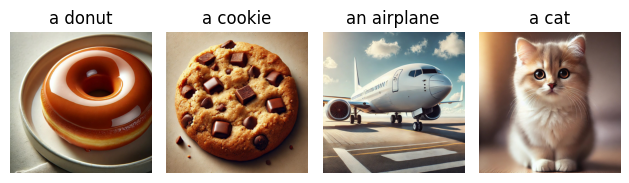

In [3]:
# Utility function for displaying images with labels
def plot_images(images, labels):
  n = len(images)                        # Number of images loaded successfully
  fig, axes = plt.subplots(1, n)         # Create subplots with one row and n columns
  # Loop through each subplot axis, image, and its label to display them
  for ax, img, lbl in zip(axes, images, labels):
      ax.imshow(img)                     # Display the image on the axis
      ax.set_title(lbl)                  # Set the title of the subplot to the image label
      ax.axis("off")                     # Turn off axis ticks and labels for clarity

  plt.tight_layout()                     # Adjust layout to prevent overlap
  plt.show()                             # Show the image plot
# Dictionary containing labels and their corresponding image URLs
image_urls = {
    "a donut": "https://learnopencv.com/wp-content/uploads/2025/03/donut.jpeg",
    "a cookie": "https://learnopencv.com/wp-content/uploads/2025/03/cookie.jpeg",
    "an airplane": "https://learnopencv.com/wp-content/uploads/2025/03/airplane.jpeg",
    "a cat": "https://learnopencv.com/wp-content/uploads/2025/03/cat.jpeg"
}

# Extract the list of labels from the dictionary keys
labels = list(image_urls.keys())

# Define a robust function to load images from URLs
def load_image(url):
    headers = {'User-Agent': 'Mozilla/5.0'}  # Set headers to avoid blocking by web servers
    response = requests.get(url, headers=headers)  # Request the image from the URL
    response.raise_for_status()  # Raise an error if the download fails
    # Open the downloaded image, convert it to RGB format, and return the PIL Image
    return Image.open(BytesIO(response.content)).convert("RGB")

# Initialize empty lists for successfully loaded images and their labels
images = []

# Loop through each label to load the associated image
for label in labels:
    try:
        img = load_image(image_urls[label])  # Load image from URL
        images.append(img)                   # Append loaded image to images list
    except requests.exceptions.RequestException as e:
        # If an image fails to load, print an error message
        print(f"Failed to load {label}: {e}")

# Display the loaded images in a single row using matplotlib
plot_images(images, labels)

**Hooray**!

If you see a four images on top of this cell, the setup test was successfully completed.

If not, and it’s during the class on Monday, May 19, please raise your hands and get help from a Teaching Assitant (TA).

If it’s before class and you are testing your setup, please email us at vlm-training@embeddedvisionsummit.com and let us know the problem you're encountering.  Please include your full name and a phone number where we can reach you.  Screen shots are super helpful!

Thanks!